In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
listings = pd.read_csv('../data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20240323200252,2024-03-24,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",within a day,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in home,Private room,1,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Free street parking"", ""Essentia...",$67.00,31,365,31,31,365,365,31.0,365.0,NaN,t,30,60,90,365,2024-03-24,84,2,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.52
1,3943,https://www.airbnb.com/rooms/3943,20240323200252,2024-03-23,city scrape,Historic Rowhouse Near Monuments,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""M...",$85.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,2,19,39,305,2024-03-23,498,43,0,2009-05-10,2024-01-15,4.83,4.88,4.92,4.94,4.91,4.58,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.75
2,4197,https://www.airbnb.com/rooms/4197,20240323200252,2024-03-24,city scrape,Capitol Hill Bedroom walk to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/93c77...,https://a0.muscache.com/im/pictures/user/93c77...,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88719,-76.99472,Private room in home,Private room,1,1.5,1.5 shared baths,1.0,1.0,"[""Microwave"", ""Hair dryer""

In [5]:
listings.shape

(4523, 75)

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523 entries, 0 to 4522
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4523 non-null   int64  
 1   listing_url                                   4523 non-null   object 
 2   scrape_id                                     4523 non-null   int64  
 3   last_scraped                                  4523 non-null   object 
 4   source                                        4523 non-null   object 
 5   name                                          4523 non-null   object 
 6   description                                   4466 non-null   object 
 7   neighborhood_overview                         3279 non-null   object 
 8   picture_url                                   4523 non-null   object 
 9   host_id                                       4523 non-null   i

#### ID is a unique identifier; there's 4,523 unique IDs for listing but just 2,395 for host as some hosts have multiple listings

In [7]:
listings['id'].nunique(), listings['host_id'].nunique()

(4523, 2395)

#### Make the ID the index

In [8]:
listings.set_index('id', inplace = True)

In [9]:
listings.sample(5)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1083066214273133508,https://www.airbnb.com/rooms/1083066214273133508,20240323200252,2024-03-24,city scrape,Beautiful Townhome in Shaw/Bloomingdale,"Welcome to our stunning, centrally-located tow...",This house is in between the famous Shaw and B...,https://a0.muscache.com/pictures/miso/Hosting-...,4949915,https://www.airbnb.com/users/show/4949915,Jessica,2013-02-03,"Washington, DC","Hi! I'm a doctor working in global health, whi...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/aff4a...,https://a0.muscache.com/im/pictures/user/aff4a...,Northwest Washington,1,1,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.910562,-77.016459,Entire townhouse,Entire home/apt,8,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""B...",$330.00,1,1125,1,4,1125,1125,3.6,1125.0,NaN,t,4,10,19,286,2024-03-24,2,2,2,2024-03-03,2024-03-06,5.0,5.00,5.00,5.00,5.00,5.00,5.00,Hosted License: 5007262201002744,f,1,1,0,0,2.00
16959752,https://www.airbnb.com/rooms/16959752,20240323200252,2024-03-24,city scrape,Capitol Hill Rowhouse Amazing location 2 of 3 BDR,Two bedrooms available in three-bedroom house ...,Location: I've lived in DC for over 30 years a...,https://a0.muscache.com/pictures/95964fd1-ae58...,4642626,https://www.airbnb.com/users/show/4642626,Amy,2013-01-09,"Kigali, Rwanda",I am Democratic political consultant who trave...,within an hour,90%,59%,t,https://a0.muscache.com/im/pictures/user/2db32...,https://a0.muscache.com/im/pictures/user/2db32...,Capitol Hill,14,24,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.881010,-76.998930,Entire townhouse,Entire home/apt,4,1.5,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Free street parking"", ""Essenti...",$286.00,31,1125,31,31,1125,1125,31.0,1125.0,NaN,t,30,60,90,269,2024-03-24,4,0,0,2018-08-18,2021-01-17,5.0,5.00,4.25,5.00,5.00,5.00,5.00,NaN,f,3,1,2,0,0.06
783981971435886859,https://www.airbnb.com/rooms/783981971435886859,20240323200252,2024-03-24,city scrape,Elliott Street Executive Suite,You'll have everything you need at your finger...,Grab breakfast to go from one of the local eat...,https://a0.muscache.com/pictures/miso/Hosting-...,108080929,https://www.airbnb.com/users/show/108080929,Mark,2016-12-22,"Baltimore, MD","Hello,\r\n\r\nMy name is Mark Reed. I live in...",within an hour,100%,70%,t,https://a0.muscache.com/im/pictures/user/d21f4...,https://a0.muscache.com/im/pictures/user/d21f4...,Near Northeast/H Street Corrido

#### No missing data in reviews

In [10]:
reviews = pd.read_csv('../data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,3686,213212,2011-03-30,428455,Pete,Great host! Very welcoming and organised. I st...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322949 entries, 0 to 322948
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     322949 non-null  int64 
 1   id             322949 non-null  int64 
 2   date           322949 non-null  object
 3   reviewer_id    322949 non-null  int64 
 4   reviewer_name  322948 non-null  object
 5   comments       322862 non-null  object
dtypes: int64(3), object(3)
memory usage: 14.8+ MB


#### Drop nulls on review scores. If they don't have review scores, can't predict what the score would be.

In [12]:
reviewed = listings.dropna(subset = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_value'], how = 'any')
reviewed.head()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3686,https://www.airbnb.com/rooms/3686,20240323200252,2024-03-24,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",within a day,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in home,Private room,1,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Free street parking"", ""Essentia...",$67.00,31,365,31,31,365,365,31.0,365.0,NaN,t,30,60,90,365,2024-03-24,84,2,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.52
3943,https://www.airbnb.com/rooms/3943,20240323200252,2024-03-23,city scrape,Historic Rowhouse Near Monuments,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""M...",$85.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,2,19,39,305,2024-03-23,498,43,0,2009-05-10,2024-01-15,4.83,4.88,4.92,4.94,4.91,4.58,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.75
4197,https://www.airbnb.com/rooms/4197,20240323200252,2024-03-24,city scrape,Capitol Hill Bedroom walk to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/93c77...,https://a0.muscache.com/im/pictures/user/93c77...,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88719,-76.99472,Private room in home,Private

In [13]:
reviewed.sample(5)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50733800,https://www.airbnb.com/rooms/50733800,20240323200252,2024-03-24,city scrape,Adorable English Basement on 15th St,Cute English Basement Studio Unit with One Que...,"This is a studio apartment in a vibrant, safe ...",https://a0.muscache.com/pictures/miso/Hosting-...,2298713,https://www.airbnb.com/users/show/2298713,Alexander,2012-05-05,"Washington, DC",I am recently completed a Urban Planning Mast...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/2298713/profi...,https://a0.muscache.com/im/users/2298713/profi...,Northwest Washington,1,2,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States","Howard University, Le Droit Park, Cardozo/Shaw",NaN,38.91844,-77.03342,Entire guesthouse,Entire home/apt,3,1.0,1 bath,0.0,1.0,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""F...",$109.00,1,19,1,19,1125,1125,1.2,1125.0,NaN,t,5,18,39,119,2024-03-24,171,63,6,2021-08-06,2024-03-08,4.86,4.89,4.88,4.94,4.91,4.95,4.79,Hosted License: 5007242201000561,t,1,1,0,0,5.33
19713065,https://www.airbnb.com/rooms/19713065,20240323200252,2024-03-24,previous scrape,"Sunny, Big, 1 BDR in 2 BDR 1BA $1763mo 30 day ...","Your sunny BDR has: QN bed, pillows, dresser, ...","Tree-lined, historic neighborhood with quaint ...",https://a0.muscache.com/pictures/3066ac93-9640...,4558526,https://www.airbnb.com/users/show/4558526,K.,2013-01-02,"Washington, DC",I thrive on helping busy global travelers feel...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/0a377...,https://a0.muscache.com/im/pictures/user/0a377...,Adams Morgan,2,2,"['email', 'phone']",t,f,"Washington, District of Columbia, United States","Kalorama Heights, Adams Morgan, Lanier Heights",NaN,38.92641,-77.04071,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,NaN,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""B...",NaN,31,120,31,31,1125,1125,31.0,1125.0,NaN,t,30,60,90,90,2024-03-24,9,0,0,2017-09-28,2022-07-14,4.89,5.00,4.78,4.89,4.89,4.67,4.56,NaN,f,1,0,1,0,0.11
17558492,https://www.airbnb.com/rooms/17558492,20240323200252,2024-03-24,city scrape,Beautiful Nats Park/Capitol Hill Oasis,Beautiful modern home in a perfect location. L...,"Located in Navy Yard, 3 blocks from the Navy Y...",https://a0.muscache.com/pictures/9c12b0a8-e8b1...,108624574,https://www.airbnb.com/users/show/108624574,Eno,2016-12-26,"Washington, DC",I'm a DC native and have lived her most of my ...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/56779...,https://a0.muscache.com/im/pictures/user/56779...,Southwest Waterfront,2,2,"['email', 'phone']",t,t,"Washington,

In [14]:
# No nulls in 
reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 3686 to 1108785205538314122
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3803 non-null   object 
 1   scrape_id                                     3803 non-null   int64  
 2   last_scraped                                  3803 non-null   object 
 3   source                                        3803 non-null   object 
 4   name                                          3803 non-null   object 
 5   description                                   3757 non-null   object 
 6   neighborhood_overview                         2846 non-null   object 
 7   picture_url                                   3803 non-null   object 
 8   host_id                                       3803 non-null   int64  
 9   host_url                                      3803

In [15]:
#### Get descriptive statistics on columns related to reviews

In [16]:
# From Stack Overflow: https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
# Got the names of columns with review in it, then called .describe on that
reviewed[reviewed.columns[reviewed.columns.str.contains('review')]].describe()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,84.917434,21.572180,1.711544,4.770529,4.810860,4.783224,4.868788,4.870973,4.743723,4.711191,2.171373
std,113.839103,24.475836,2.213640,0.326274,0.314223,0.311196,0.279421,0.277309,0.352365,0.351320,2.028356
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,10.000000,2.000000,0.000000,4.700000,4.760000,4.710000,4.860000,4.860000,4.660000,4.630000,0.575000
50%,39.000000,13.000000,1.000000,4.860000,4.900000,4.880000,4.950000,4.950000,4.860000,4.800000,1.660000
75%,117.000000,35.000000,3.000000,4.960000,4.980000,4.970000,5.000000,5.000000,4.970000,4.900000,3.200000
max,966.000000,309.000000,28.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.290000


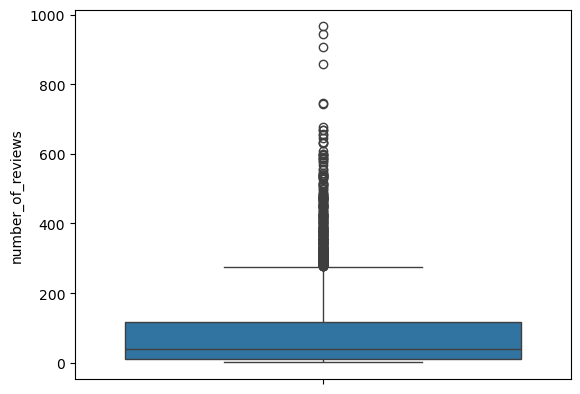

In [17]:
sns.boxplot(reviewed['number_of_reviews']);

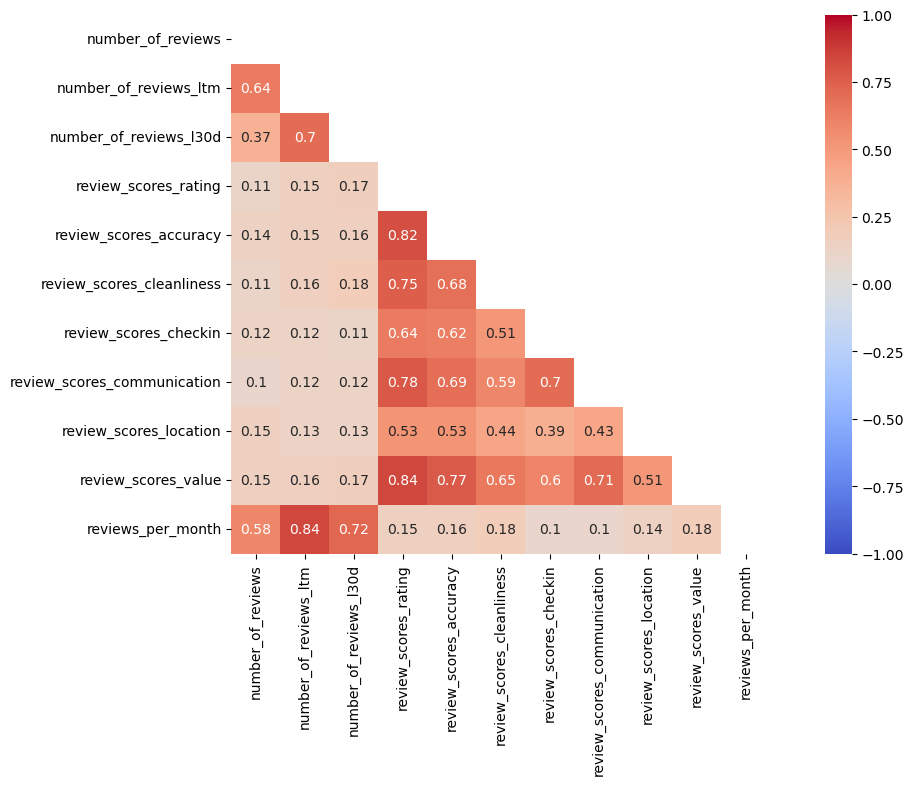

In [18]:
plt.figure(figsize = (14,7))

corr = round(reviewed[reviewed.columns[reviewed.columns.str.contains('review')]].corr(numeric_only = True), 2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           square = True,
           annot = True,
           mask = mask,
           cmap = 'coolwarm');

#### There is a very weak correlation between the number of reviews (overall or recently) and the review score itself. 

#### The review scores are highly correlated with each. The location review is less correlated with other review scores (0.43 to 0.53), while the other review scores all have at least a 0.5 correlation with each other.

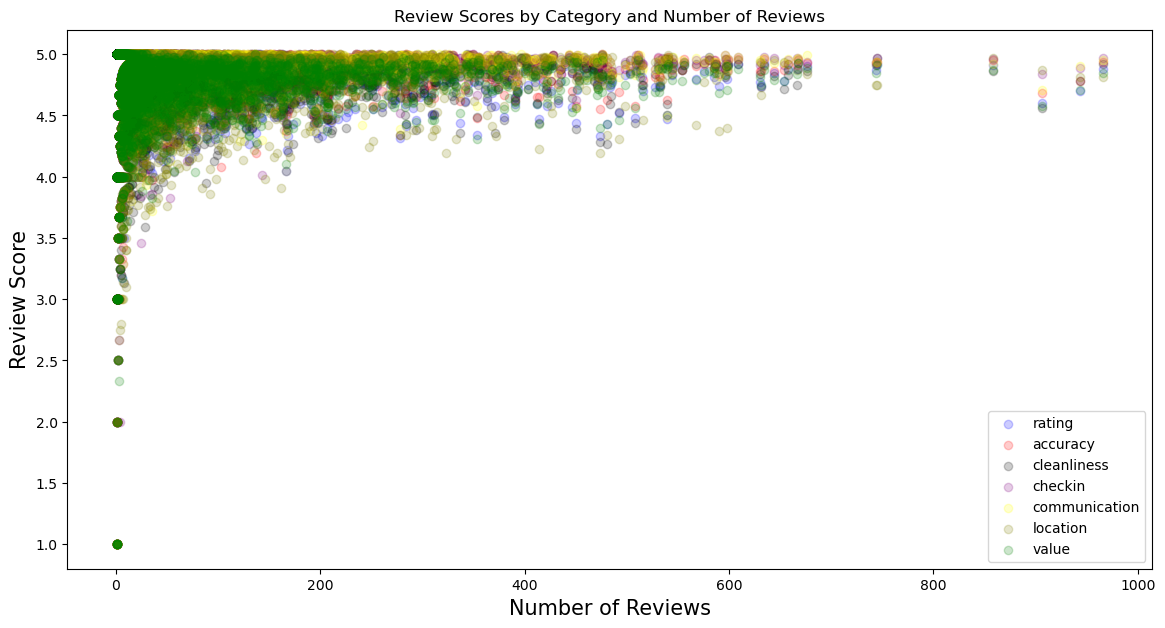

In [19]:
plt.figure(figsize = (14,7))

plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_rating'], color = 'blue', label = 'rating', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_accuracy'], color = 'red', label = 'accuracy', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_cleanliness'], color = 'black', label = 'cleanliness', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_checkin'], color = 'purple', label = 'checkin', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_communication'], color = 'yellow', label = 'communication', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_location'], color = 'olive', label = 'location', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_value'], color = 'green', label = 'value', alpha = 0.2)

plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Review Score', fontsize = 15)
plt.title('Review Scores by Category and Number of Reviews')

plt.legend();

plt.savefig('../images/review_scores_by_cat_number_reviews.png', dpi = 192);

#### The listings with more reviews have no "poor" reviews (as defined by a score of less than 4.0).

#### That's not surprising, since listings with poor reviews would likely not get a lot of stays / reviewers.

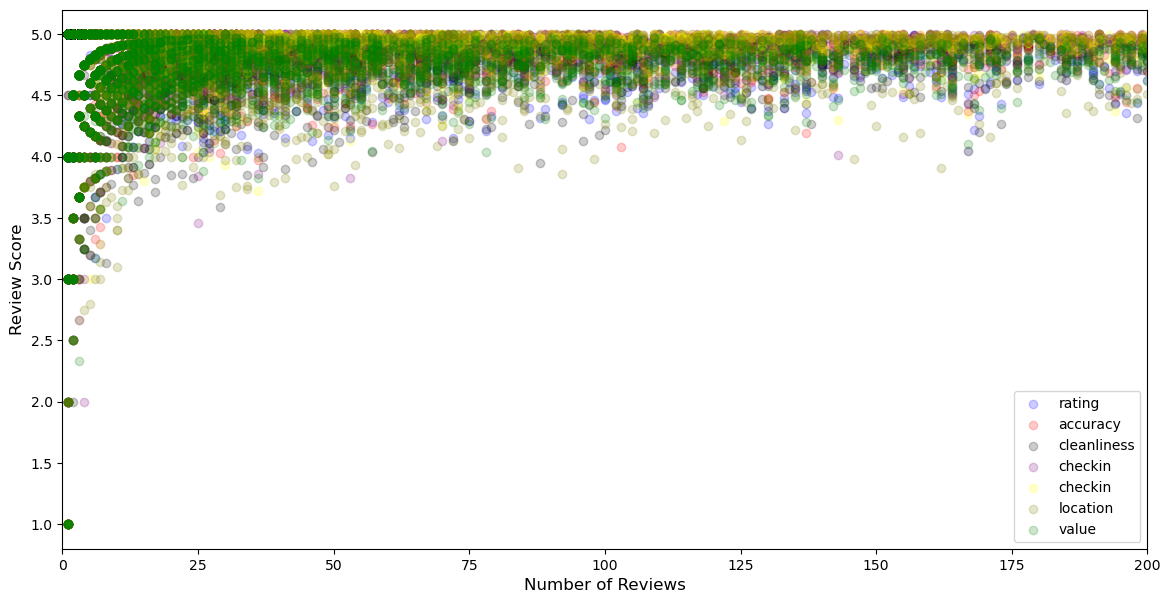

In [20]:
plt.figure(figsize = (14,7))

plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_rating'], color = 'blue', label = 'rating', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_accuracy'], color = 'red', label = 'accuracy', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_cleanliness'], color = 'black', label = 'cleanliness', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_checkin'], color = 'purple', label = 'checkin', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_communication'], color = 'yellow', label = 'checkin', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_location'], color = 'olive', label = 'location', alpha = 0.2)
plt.scatter(reviewed['number_of_reviews'], reviewed['review_scores_value'], color = 'green', label = 'value', alpha = 0.2)

plt.xlabel('Number of Reviews', fontsize = 12)
plt.ylabel('Review Score', fontsize = 12)

plt.xlim(0,200)

plt.legend();

#### Same as above, but just looking at those with less than 200 reviews to zoom in on those that are less frequently reviewed.

#### Creating data frame of just the review scores.

In [21]:
review_scores_df = reviewed[reviewed.columns[reviewed.columns.str.contains('review_scores')]]
review_scores_df

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,
3686,4.64,4.73,4.45,4.91,4.84,3.91,4.64
3943,4.83,4.88,4.92,4.94,4.91,4.58,4.75
4197,4.86,4.98,4.88,5.00,4.98,4.96,4.95
4529,4.66,4.80,4.60,4.93,4.93,4.51,4.83
5589,4.50,4.71,4.13,4.82,4.82,4.91,4.44
...,...,...,...,...,...,...,...
1103891402418059234,5.00,5.00,5.00,5.00,5.00,5.00,4.00
1105359684726963524,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1106726693442457671,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [22]:
### Renaming the columns to make it easier to chart
review_scores_df.columns = [col.replace('review_scores_', '') for col in review_scores_df.columns]
review_scores_df

,rating,accuracy,cleanliness,checkin,communication,location,value
id,,,,,,,
3686,4.64,4.73,4.45,4.91,4.84,3.91,4.64
3943,4.83,4.88,4.92,4.94,4.91,4.58,4.75
4197,4.86,4.98,4.88,5.00,4.98,4.96,4.95
4529,4.66,4.80,4.60,4.93,4.93,4.51,4.83
5589,4.50,4.71,4.13,4.82,4.82,4.91,4.44
...,...,...,...,...,...,...,...
1103891402418059234,5.00,5.00,5.00,5.00,5.00,5.00,4.00
1105359684726963524,5.00,5.00,5.00,5.00,5.00,5.00,5.00
1106726693442457671,5.00,5.00,5.00,5.00,5.00,5.00,5.00


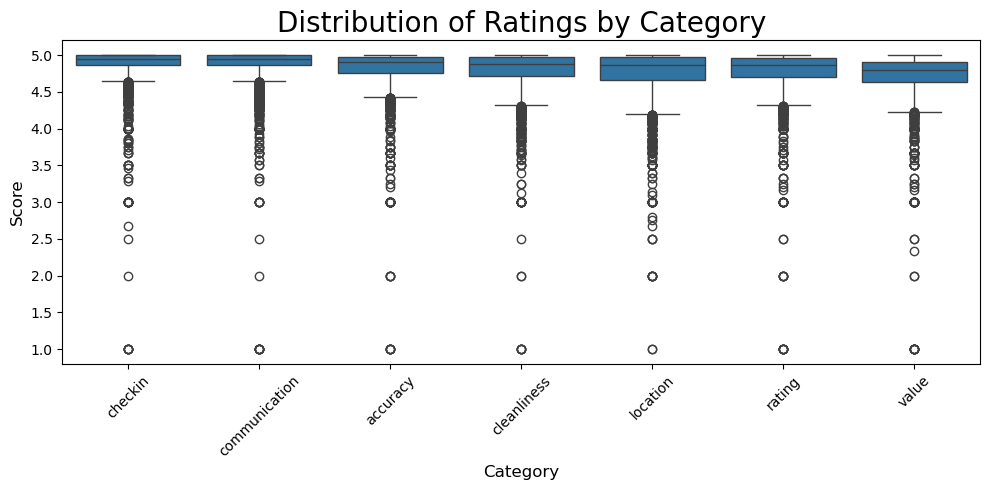

In [23]:
# ChatGPT suggested .melted to run 1 boxplot against multiple scores
review_scores_melted = review_scores_df.melt(value_vars = review_scores_df.columns, var_name = 'category', value_name = 'score')

#Created median order to rank the reviews by the highest median order
median_order = review_scores_melted.groupby('category')['score'].median().sort_values(ascending = False).index

plt.figure(figsize = (10,5))

sns.boxplot(x = 'category', y = 'score', data = review_scores_melted, order = median_order)

plt.xticks(rotation = 45)

plt.xlabel('Category', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.title('Distribution of Ratings by Category', fontsize = 20)

plt.tight_layout()

plt.savefig('../images/distribution_ratings_by_category.png', dpi = 192);

#### Is the rating score a summary of the other scores? Doesn't look like it, but will check

In [24]:
review_scores_df['rating'] == ( (review_scores_df['accuracy'] + review_scores_df['cleanliness'] + review_scores_df['checkin'] + review_scores_df['communication'] + review_scores_df['location'] + review_scores_df['value'] ) /6 )

id
3686                   False
3943                   False
4197                   False
4529                   False
5589                   False
                       ...  
1103891402418059234    False
1105359684726963524     True
1106726693442457671     True
1107281043154858967    False
1108785205538314122    False
Length: 3803, dtype: bool

In [25]:
review_scores_df['avg_rating'] = review_scores_df.mean(axis = 1)
review_scores_df

C:\Users\david\AppData\Local\Temp\ipykernel_15976\3829629357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_scores_df['avg_rating'] = review_scores_df.mean(axis = 1)


,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating
id,,,,,,,,
3686,4.64,4.73,4.45,4.91,4.84,3.91,4.64,4.588571
3943,4.83,4.88,4.92,4.94,4.91,4.58,4.75,4.830000
4197,4.86,4.98,4.88,5.00,4.98,4.96,4.95,4.944286
4529,4.66,4.80,4.60,4.93,4.93,4.51,4.83,4.751429
5589,4.50,4.71,4.13,4.82,4.82,4.91,4.44,4.618571
...,...,...,...,...,...,...,...,...
1103891402418059234,5.00,5.00,5.00,5.00,5.00,5.00,4.00,4.857143
1105359684726963524,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000000
1106726693442457671,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000000


In [26]:
review_scores_df.describe()

,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,4.770529,4.810860,4.783224,4.868788,4.870973,4.743723,4.711191,4.794184
std,0.326274,0.314223,0.311196,0.279421,0.277309,0.352365,0.351320,0.260661
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.700000,4.760000,4.710000,4.860000,4.860000,4.660000,4.630000,4.735714
50%,4.860000,4.900000,4.880000,4.950000,4.950000,4.860000,4.800000,4.857143
75%,4.960000,4.980000,4.970000,5.000000,5.000000,4.970000,4.900000,4.930000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


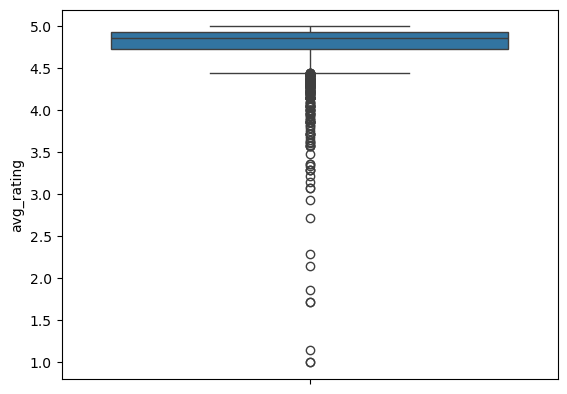

In [27]:
sns.boxplot(review_scores_df['avg_rating']);

In [28]:
### This is the cutoff for those below the 5th percentile - the line above
review_scores_df['avg_rating'].quantile(0.05)

4.428571428571429

In [29]:
review_scores_df.head()

,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating
id,,,,,,,,
3686,4.64,4.73,4.45,4.91,4.84,3.91,4.64,4.588571
3943,4.83,4.88,4.92,4.94,4.91,4.58,4.75,4.830000
4197,4.86,4.98,4.88,5.00,4.98,4.96,4.95,4.944286
4529,4.66,4.80,4.60,4.93,4.93,4.51,4.83,4.751429
5589,4.50,4.71,4.13,4.82,4.82,4.91,4.44,4.618571


#### Create categorical variables based on the average score: one where the poor is 4 or lower, another where poor is the 5th percentile or lower

In [30]:
review_scores_df['avg_score_below_4'] = np.where(review_scores_df['avg_rating'] < 4, 1, 0)
review_scores_df[review_scores_df['avg_rating'] < 4].sort_values('avg_rating')

C:\Users\david\AppData\Local\Temp\ipykernel_15976\715146581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_scores_df['avg_score_below_4'] = np.where(review_scores_df['avg_rating'] < 4, 1, 0)


,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating,avg_score_below_4
id,,,,,,,,,
680234819381797784,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1
1064426928812280822,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1
1073414655132606131,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.142857,1
982235558107873242,1.00,2.00,3.00,1.00,1.00,3.00,1.00,1.714286,1
39551431,2.00,3.00,1.00,1.00,1.00,3.00,1.00,1.714286,1
718121685240518779,2.00,1.00,1.00,3.00,2.00,2.00,2.00,1.857143,1
1095650085936455359,1.00,1.00,5.00,1.00,1.00,5.00,1.00,2.142857,1
589687744729213812,1.00,2.00,3.00,5.00,1.00,3.00,1.00,2.285714,1
953519360448083945,2.00,1.00,4.00,3.00,5.00,3.00,1.00,2.714286,1


In [31]:
review_scores_df[review_scores_df['avg_rating'] >= 4].sort_values('avg_rating')

,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating,avg_score_below_4
id,,,,,,,,,
52396501,5.0,3.0,5.0,5.0,4.0,3.0,3.0,4.0,0
1092091371900294188,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,0
39755135,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0
635195484513465959,4.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,0
836853812908433483,3.5,4.0,4.0,4.5,4.0,5.0,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...
46760481,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
6047348,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
989288987344893634,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0


In [32]:
review_scores_df['avg_score_below_5th_percentile'] = np.where(review_scores_df['avg_rating'] < review_scores_df['avg_rating'].quantile(0.05), 1, 0)
review_scores_df[review_scores_df['avg_rating'] < review_scores_df['avg_rating'].quantile(0.05) ].sort_values('avg_rating')

C:\Users\david\AppData\Local\Temp\ipykernel_15976\3397661130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_scores_df['avg_score_below_5th_percentile'] = np.where(review_scores_df['avg_rating'] < review_scores_df['avg_rating'].quantile(0.05), 1, 0)


,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating,avg_score_below_4,avg_score_below_5th_percentile
id,,,,,,,,,,
680234819381797784,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1,1
1064426928812280822,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1,1
1073414655132606131,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.142857,1,1
39551431,2.00,3.00,1.00,1.00,1.00,3.00,1.00,1.714286,1,1
982235558107873242,1.00,2.00,3.00,1.00,1.00,3.00,1.00,1.714286,1,1
...,...,...,...,...,...,...,...,...,...,...
20678886,4.38,4.50,4.48,4.48,4.35,4.43,4.33,4.421429,0,1
42791712,4.38,4.46,4.00,4.62,4.76,4.49,4.24,4.421429,0,1
26427409,4.38,4.52,4.06,4.67,4.60,4.29,4.46,4.425714,0,1


#### Just 56 listings where the average score is below 4.0, 172 listings where the average score is below the 5th percentile

In [33]:
len( review_scores_df[review_scores_df['avg_rating'] < 4] ), len(review_scores_df[review_scores_df['avg_rating'] < review_scores_df['avg_rating'].quantile(0.05) ] )

(56, 172)

In [34]:
reviewed.head()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3686,https://www.airbnb.com/rooms/3686,20240323200252,2024-03-24,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., DC","I am a literary scholar, teacher, poet, vegan ...",within a day,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in home,Private room,1,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Free street parking"", ""Essentia...",$67.00,31,365,31,31,365,365,31.0,365.0,NaN,t,30,60,90,365,2024-03-24,84,2,0,2010-11-01,2023-08-30,4.64,4.73,4.45,4.91,4.84,3.91,4.64,NaN,f,1,0,1,0,0.52
3943,https://www.airbnb.com/rooms/3943,20240323200252,2024-03-23,city scrape,Historic Rowhouse Near Monuments,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, DC",I travel often and always try to immerse mysel...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Dining table"", ""Hair dryer"", ""M...",$85.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,2,19,39,305,2024-03-23,498,43,0,2009-05-10,2024-01-15,4.83,4.88,4.92,4.94,4.91,4.58,4.75,Hosted License: 5007242201001033,f,5,0,5,0,2.75
4197,https://www.airbnb.com/rooms/4197,20240323200252,2024-03-24,city scrape,Capitol Hill Bedroom walk to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,https://www.airbnb.com/users/show/5061,Sandra,2008-12-12,"Washington D.C., DC",I’m a California native who came to work for t...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/93c77...,https://a0.muscache.com/im/pictures/user/93c77...,Capitol Hill,2,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",NaN,38.88719,-76.99472,Private room in home,Private

In [35]:
review_scores_df = review_scores_df.join(reviewed['number_of_reviews'])
review_scores_df

,rating,accuracy,cleanliness,checkin,communication,location,value,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,number_of_reviews
id,,,,,,,,,,,
3686,4.64,4.73,4.45,4.91,4.84,3.91,4.64,4.588571,0,0,84
3943,4.83,4.88,4.92,4.94,4.91,4.58,4.75,4.830000,0,0,498
4197,4.86,4.98,4.88,5.00,4.98,4.96,4.95,4.944286,0,0,59
4529,4.66,4.80,4.60,4.93,4.93,4.51,4.83,4.751429,0,0,102
5589,4.50,4.71,4.13,4.82,4.82,4.91,4.44,4.618571,0,0,96
...,...,...,...,...,...,...,...,...,...,...,...
1103891402418059234,5.00,5.00,5.00,5.00,5.00,5.00,4.00,4.857143,0,0,1
1105359684726963524,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,0,0,1
1106726693442457671,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,0,0,2


In [36]:
review_scores_df['avg_score_below_4'].value_counts()

avg_score_below_4
0    3747
1      56
Name: count, dtype: int64

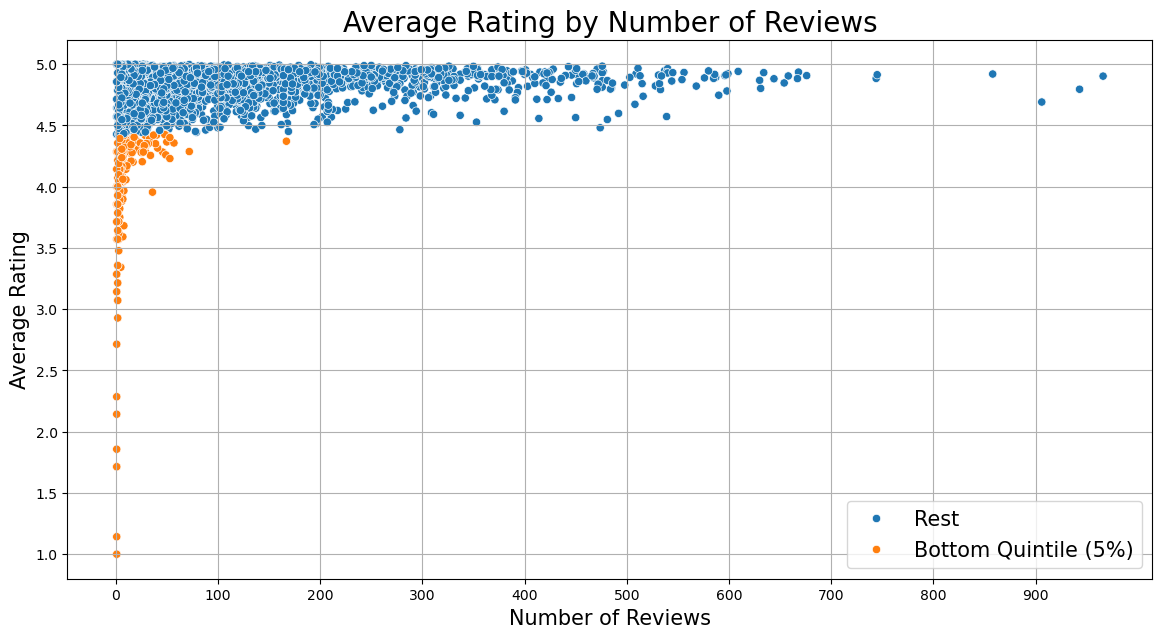

In [37]:
# Map scores into a category for the legend
review_scores_df['score_category'] = review_scores_df['avg_score_below_5th_percentile'].map({ 0 : 'Rest', 1 : 'Bottom Quintile (5%)' })

plt.figure(figsize = (14,7))

sns.scatterplot(x = 'number_of_reviews', y = 'avg_rating', hue = 'score_category', data = review_scores_df)

plt.xlabel('Number of Reviews', fontsize = 15)
plt.ylabel('Average Rating', fontsize = 15)
plt.title('Average Rating by Number of Reviews', fontsize = 20)

plt.grid(True)

plt.xticks(range(0,1000,100))
    
plt.legend(fontsize = 15)

plt.savefig('../images/avg_rating_by_review_type.png', dpi = 192);

In [78]:
review_scores_df.to_csv('../data/review_scores.csv')